In [97]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.datasets import load_digits,load_iris
import  matplotlib.pyplot as plt
import seaborn as sb
from sklearn.metrics import classification_report

In [35]:
iris=load_iris()

In [36]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [37]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [38]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [39]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [40]:
df['target']=iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [55]:
df['flower_names']=df.target.apply(lambda x: iris.target_names[x])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [56]:
df0=df[df.target==0]
df1=df[df.target==1]
df2=df[df.target==2]

In [68]:
X=df.drop(['target','flower_names'],axis='columns')
Y=df.target

In [78]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [71]:
svc.fit(X_train,Y_train)

SVC()

In [72]:
svc.score(X_test,Y_test)

1.0

In [73]:
Y_predicted=svc.predict(X_test)

In [74]:
cm=confusion_matrix(Y_predicted,Y_test)

In [75]:
cm

array([[12,  0,  0],
       [ 0, 10,  0],
       [ 0,  0,  8]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

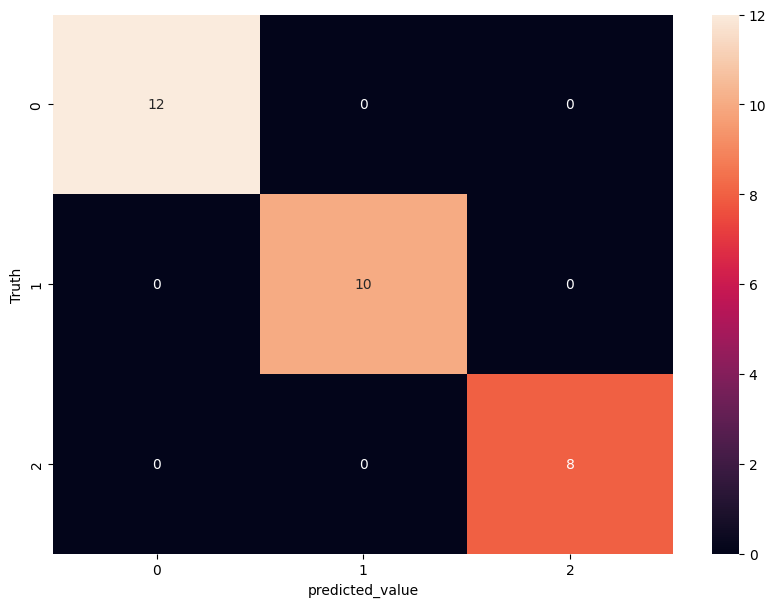

In [77]:
plt.figure(figsize=(10,7))
sb.heatmap(cm,annot=True)
plt.xlabel('predicted_value')
plt.ylabel('Truth')

In [83]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=3)

In [84]:
knn.score(X_test,Y_test)

0.9666666666666667

In [85]:
len(X_test)

30

In [87]:
len(X_train)

120

In [91]:
y_predicted=knn.predict(X_test)

In [95]:
cm1=confusion_matrix(Y_test,y_predicted)

Text(58.222222222222214, 0.5, 'Truth')

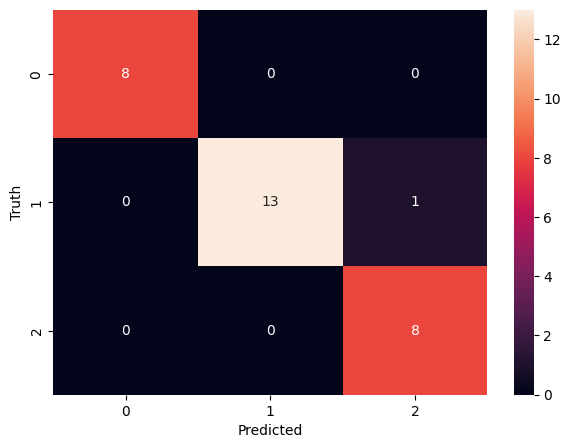

In [96]:
plt.figure(figsize=(7,5))
sb.heatmap(cm1,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [102]:
print(classification_report(Y_test,y_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      0.93      0.96        14
           2       0.89      1.00      0.94         8

    accuracy                           0.97        30
   macro avg       0.96      0.98      0.97        30
weighted avg       0.97      0.97      0.97        30

